In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [3]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

data = pd.get_dummies(data, columns=["Churn"], drop_first=True)

data = data[data["TotalCharges"] != " "]
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="ignore")

train_set, test_set = train_test_split(data, test_size = 0.2, random_state=44)

data = train_set.drop(["customerID", "Churn_Yes"], axis=1)
data_labels = train_set["Churn_Yes"].copy()

data_num = data[["tenure", "MonthlyCharges", "TotalCharges"]]
data_cat = data.drop(columns=["tenure", "MonthlyCharges", "TotalCharges"])


num_attribs = list(data_num)
cat_attribs = list(data_cat)

full_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_attribs),
    ("cat", OneHotEncoder(drop="first"), cat_attribs),
])

data_prepared = full_pipeline.fit_transform(data)


X_train, X_val, y_train, y_val = train_test_split(data_prepared, data_labels, test_size = 0.25,
                                                  random_state=44, stratify=data_labels)

Feature: 0, Score: 0.19989
Feature: 1, Score: 0.05583
Feature: 2, Score: 0.12472
Feature: 3, Score: 0.00367
Feature: 4, Score: 0.00802
Feature: 5, Score: 0.00847
Feature: 6, Score: 0.00811
Feature: 7, Score: 0.00178
Feature: 8, Score: 0.00170
Feature: 9, Score: 0.00484
Feature: 10, Score: 0.08733
Feature: 11, Score: 0.03063
Feature: 12, Score: 0.01157
Feature: 13, Score: 0.03674
Feature: 14, Score: 0.01715
Feature: 15, Score: 0.01060
Feature: 16, Score: 0.02761
Feature: 17, Score: 0.00649
Feature: 18, Score: 0.02127
Feature: 19, Score: 0.02871
Feature: 20, Score: 0.03513
Feature: 21, Score: 0.00427
Feature: 22, Score: 0.02010
Feature: 23, Score: 0.00527
Feature: 24, Score: 0.04474
Feature: 25, Score: 0.12531
Feature: 26, Score: 0.01171
Feature: 27, Score: 0.00473
Feature: 28, Score: 0.04957
Feature: 29, Score: 0.00404


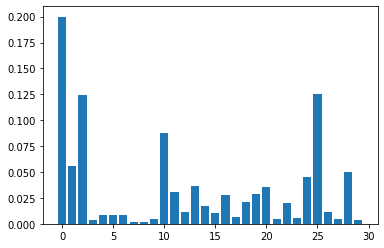

In [30]:
model = RandomForestClassifier(max_depth=7, max_features="auto", min_samples_leaf=10, class_weight="balanced", random_state=44)

model.fit(data_prepared, data_labels)

importance = model.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [31]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs

In [32]:
sorted(zip(importance, attributes), reverse=True)

[(0.19989124411625178, 'tenure'),
 (0.1247226545229792, 'TotalCharges'),
 (0.05583148547130981, 'MonthlyCharges'),
 (0.0080152165518782, 'Male'),
 (0.0036728927210831325, 'Female')]

In [22]:
importance

array([0.17317277, 0.16918182, 0.18964746, 0.02687666, 0.02153183,
       0.02407   , 0.02027524, 0.00420135, 0.00429634, 0.01921979,
       0.04031466, 0.0070967 , 0.00384018, 0.02608262, 0.008073  ,
       0.02211065, 0.00376269, 0.01915642, 0.00382916, 0.02477065,
       0.00792515, 0.01648253, 0.00528945, 0.01721319, 0.02507731,
       0.03028493, 0.02608183, 0.01375819, 0.03387818, 0.01249927])